In [325]:
#Importing all Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

import warnings
import joblib
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [327]:
#INSERTING DATA

data = pd.read_csv('Clothing.csv')
df = pd.DataFrame(data)
df

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278
1,20210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
2,20210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
3,20210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000
4,20210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000
5,20210606,97,304,3,49.887524,149.662573,Belts,Accessories,Leathers,Leather,Wells,51.209000,-2.647000
6,20210607,45,357,2,35.416016,70.832032,Ties,Accessories,Tops,Leather,Wakefield,53.680000,-1.490000
7,20210608,81,258,1,29.084205,29.084205,Polo Shirts,Menswear,Tops,Cotton,Wakefield,53.680000,-1.490000
8,20210609,47,260,3,44.498077,133.494232,Tshirts,Womenswear,Tops,Cotton,Wakefield,53.680000,-1.490000
9,20210610,24,263,3,38.497397,115.492191,Formal Shirts,Womenswear,Tops,Wool,Winchester,51.063202,-1.308000


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 30 non-null     int64  
 1   Customer_ID          30 non-null     int64  
 2   Product_ID           30 non-null     int64  
 3   Quantity             30 non-null     int64  
 4   Unit_Price           30 non-null     float64
 5   Sales_Revenue        30 non-null     float64
 6   Product_Description  30 non-null     object 
 7   Product_Category     30 non-null     object 
 8   Product_Line         30 non-null     object 
 9   Raw_Material         30 non-null     object 
 10  Region               30 non-null     object 
 11  Latitude             30 non-null     float64
 12  Longitude            30 non-null     float64
dtypes: float64(4), int64(4), object(5)
memory usage: 3.2+ KB


In [331]:
df.shape

(30, 13)

In [333]:
#IDENTIFYING MISSING VALUES

df.isnull().sum()


Date                   0
Customer_ID            0
Product_ID             0
Quantity               0
Unit_Price             0
Sales_Revenue          0
Product_Description    0
Product_Category       0
Product_Line           0
Raw_Material           0
Region                 0
Latitude               0
Longitude              0
dtype: int64

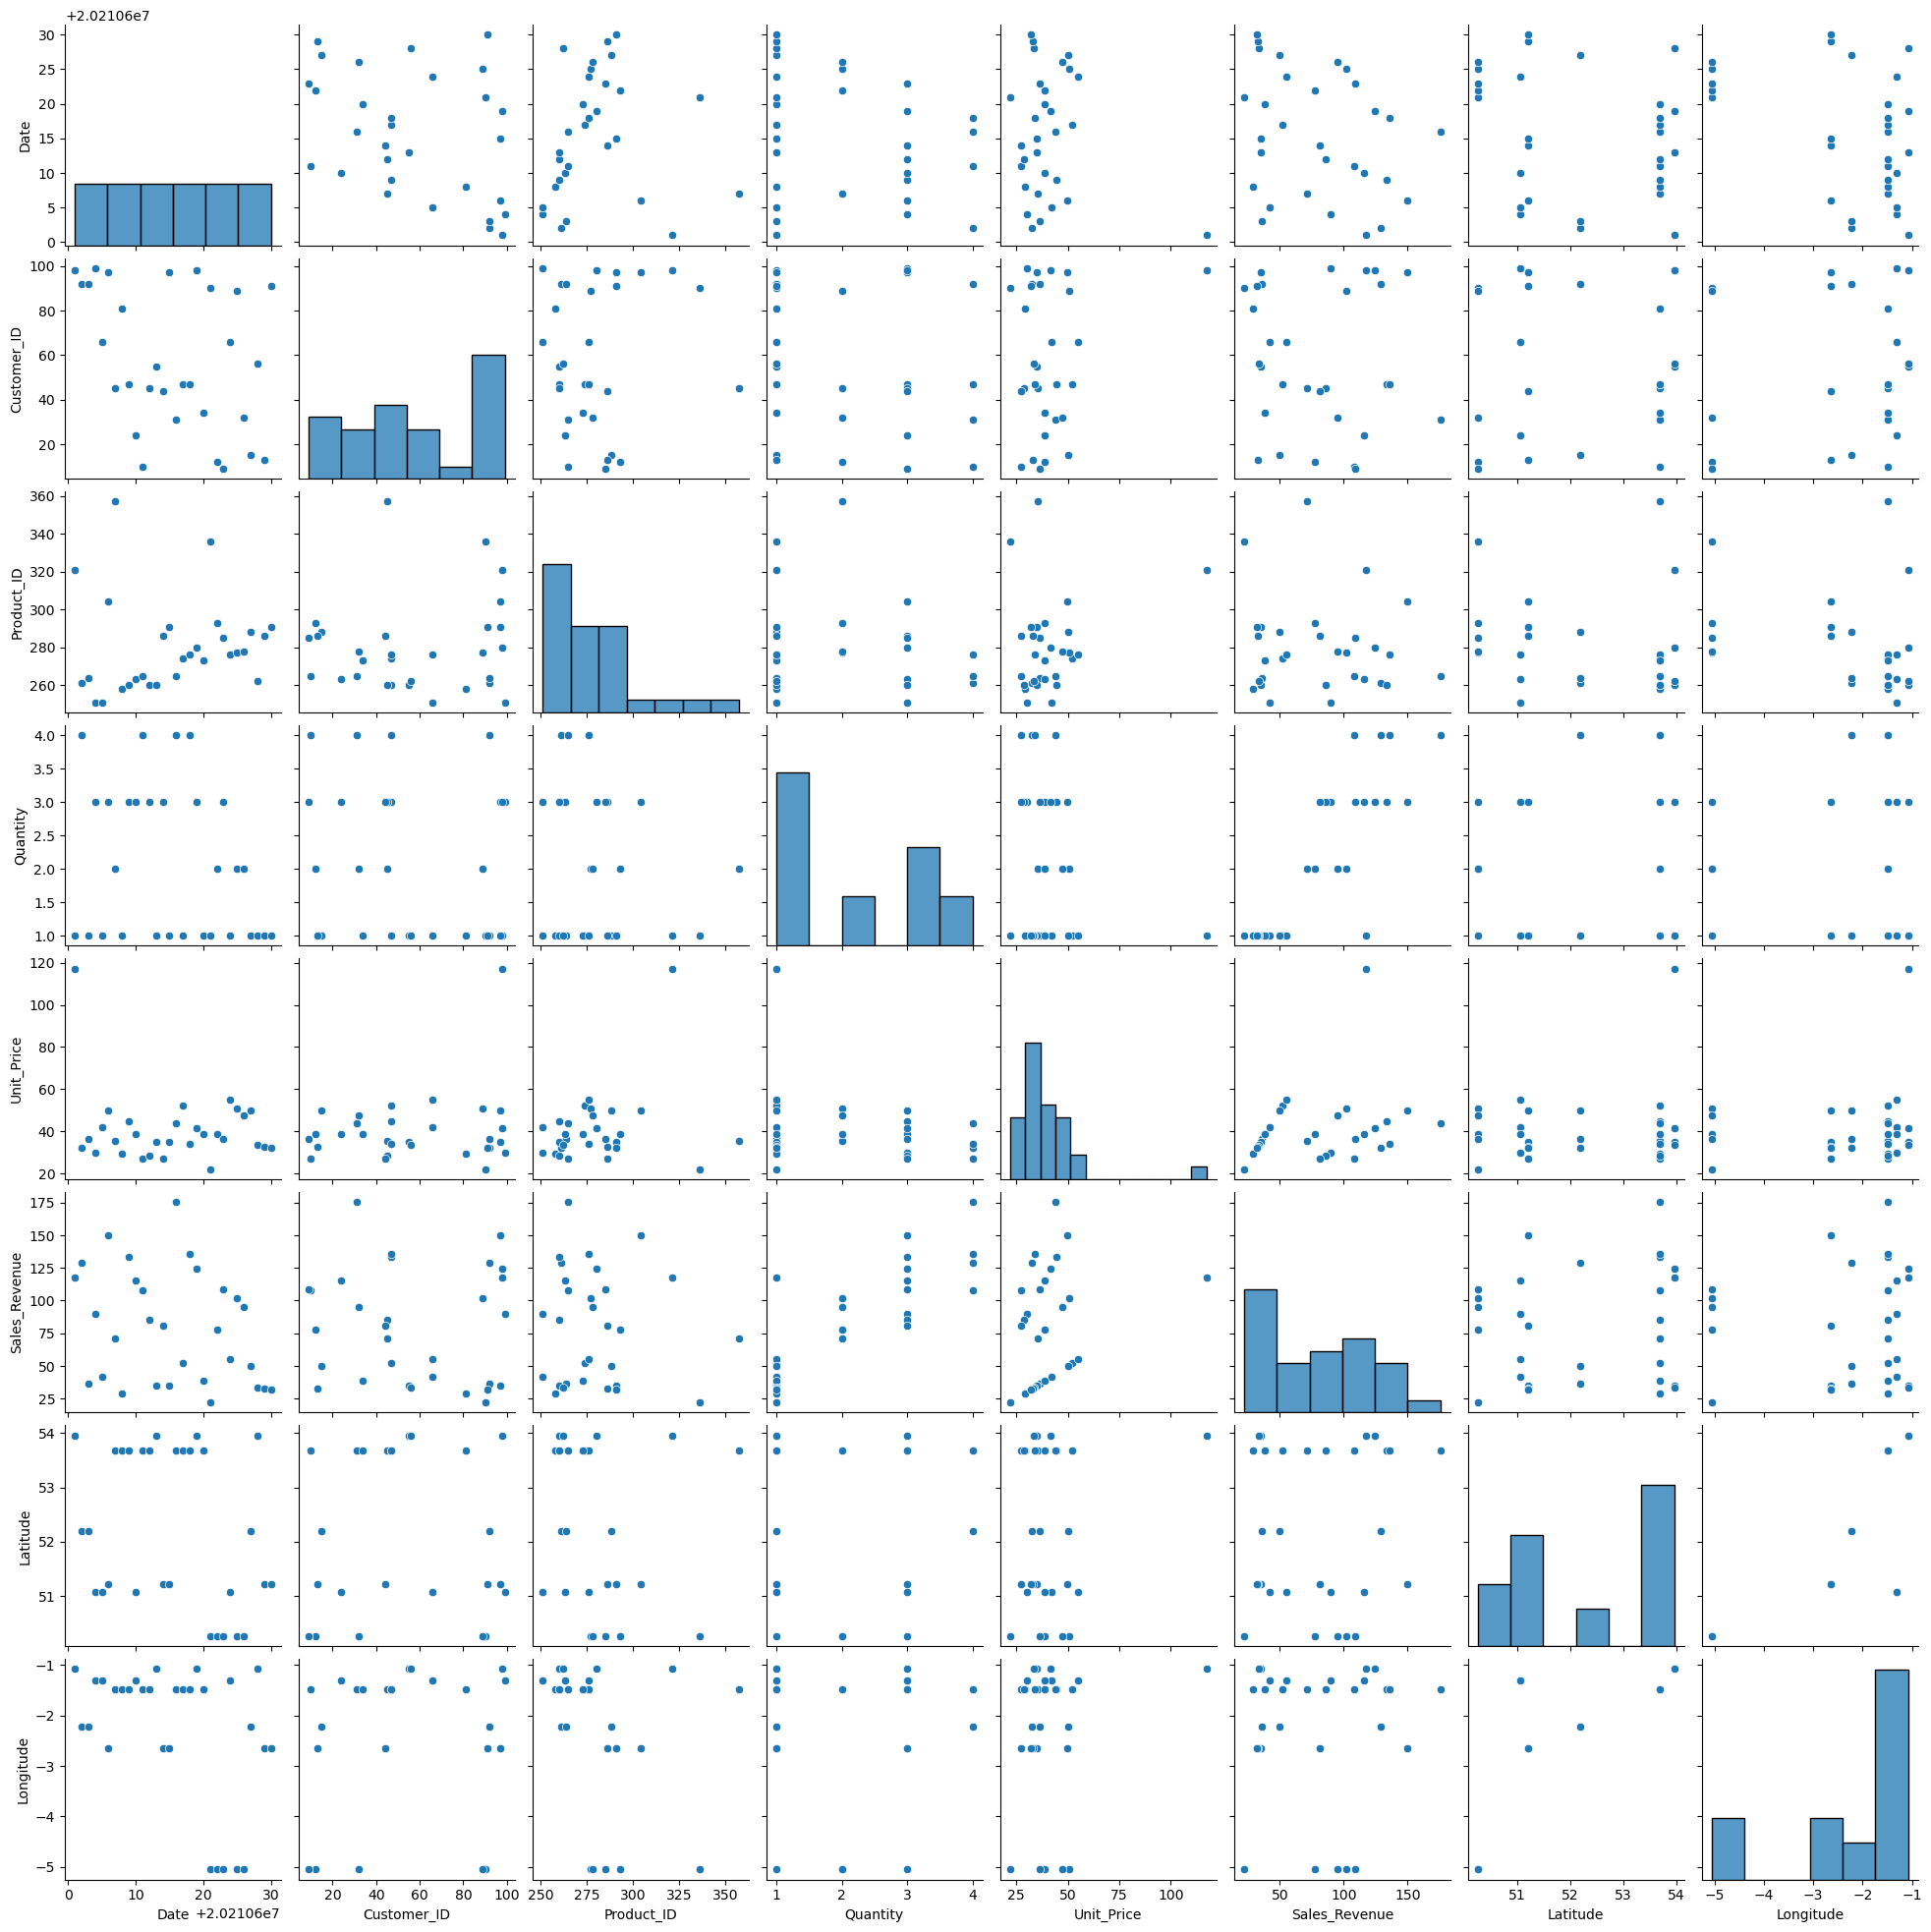

In [335]:
sns.pairplot(df)

In [336]:
# SEARCHING FOR DUPLICATES AND DROPPING THEM

print(df.duplicated().sum())

0


In [337]:
#IDENTIFYING GARBAGE VALUES

for i in df.select_dtypes(include ="object").columns:  
     print(df[i].value_counts())
     print("*"*10)

Product_Description
Knitwear           4
Formal Shirts      4
Pants              3
Polo Shirts        2
Casual Shirts      2
Pyjamas            2
Shorts             2
Ties               1
Tshirts            1
Belts              1
Suits              1
Sweats             1
Jeans              1
GolfShoes          1
Dress              1
Coats              1
Underwear          1
Cycling Jerseys    1
Name: count, dtype: int64
**********
Product_Category
Menswear       13
Womenswear     13
Sports          2
Accessories     2
Name: count, dtype: int64
**********
Product_Line
Tops        23
Trousers     5
Leathers     1
Shoes        1
Name: count, dtype: int64
**********
Raw_Material
Cotton       15
Leather       4
Wool          4
Cashmere      4
Polyester     2
Fabrics       1
Name: count, dtype: int64
**********
Region
Wakefield     9
Wells         5
Truro         5
York          4
Winchester    4
Worcester     3
Name: count, dtype: int64
**********


In [338]:
# LABEL ENCONDING


label_encoder = LabelEncoder()
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])
df['Product_Line'] = label_encoder.fit_transform(df['Product_Line'])
df['Raw_Material'] = label_encoder.fit_transform(df['Raw_Material'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Product_Description'] = label_encoder.fit_transform(df['Product_Description'])

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#Drop the data Column
df.drop(columns=['Date'], inplace=True)

print(df.head())


   Customer_ID  Product_ID  Quantity  Unit_Price  Sales_Revenue  \
0           98         321         1  117.306016     117.306016   
1           92         261         4   32.272403     129.089613   
2           92         264         1   36.193364      36.193364   
3           99         251         3   29.913403      89.740210   
4           66         251         1   41.843430      41.843430   

   Product_Description  Product_Category  Product_Line  Raw_Material  Region  \
0                    3                 2             2             2       5   
1                    1                 1             2             1       4   
2                    1                 1             2             1       4   
3                    7                 1             3             1       3   
4                   12                 3             3             1       3   

    Latitude  Longitude  Year  Month  Day  
0  53.958332  -1.080278  2021      6    1  
1  52.192001  -2.220000  202

In [339]:
print(df.columns.tolist())

['Customer_ID', 'Product_ID', 'Quantity', 'Unit_Price', 'Sales_Revenue', 'Product_Description', 'Product_Category', 'Product_Line', 'Raw_Material', 'Region', 'Latitude', 'Longitude', 'Year', 'Month', 'Day']


In [340]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          30 non-null     int64  
 1   Product_ID           30 non-null     int64  
 2   Quantity             30 non-null     int64  
 3   Unit_Price           30 non-null     float64
 4   Sales_Revenue        30 non-null     float64
 5   Product_Description  30 non-null     int32  
 6   Product_Category     30 non-null     int32  
 7   Product_Line         30 non-null     int32  
 8   Raw_Material         30 non-null     int32  
 9   Region               30 non-null     int32  
 10  Latitude             30 non-null     float64
 11  Longitude            30 non-null     float64
 12  Year                 30 non-null     int32  
 13  Month                30 non-null     int32  
 14  Day                  30 non-null     int32  
dtypes: float64(4), int32(8), int64(3)
memory u

EXPLORATORY DATA ANALYSIS


In [342]:
#Statistics Description

df.describe()

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.0,30.0,30.000000
mean,57.400000,279.733333,2.066667,40.498759,79.687953,8.133333,1.866667,2.066667,1.900000,2.10000,52.237571,-2.270437,2021.0,6.0,15.500000
std,31.457251,24.259990,1.142693,16.742578,43.008559,4.531372,1.074255,0.583292,1.647359,1.66816,1.449567,1.367443,0.0,0.0,8.803408
min,9.000000,251.000000,1.000000,21.965812,21.965812,0.000000,0.000000,0.000000,0.000000,0.00000,50.259998,-5.051000,2021.0,6.0,1.000000
25%,32.500000,262.250000,1.000000,32.390679,36.774078,5.000000,1.000000,2.000000,1.000000,1.00000,51.063202,-2.647000,2021.0,6.0,8.250000
50%,51.000000,276.000000,2.000000,36.191911,79.261696,8.000000,1.500000,2.000000,1.000000,2.00000,52.192001,-1.490000,2021.0,6.0,15.500000
75%,90.750000,287.500000,3.000000,44.341442,113.761987,11.000000,3.000000,2.000000,3.000000,3.00000,53.680000,-1.353500,2021.0,6.0,22.750000
max,99.000000,357.000000,4.000000,117.306016,175.486148,17.000000,3.000000,3.000000,5.000000,5.00000,53.958332,-1.080278,2021.0,6.0,30.000000


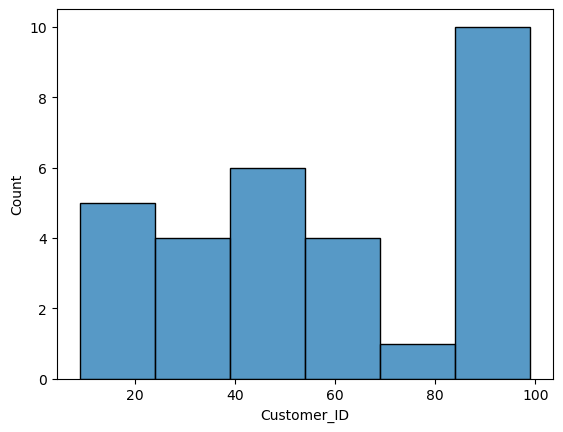

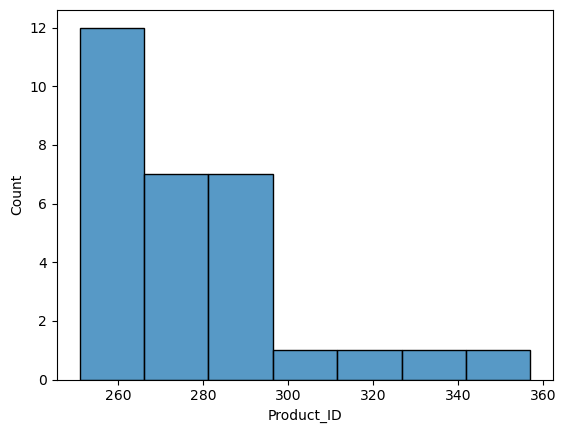

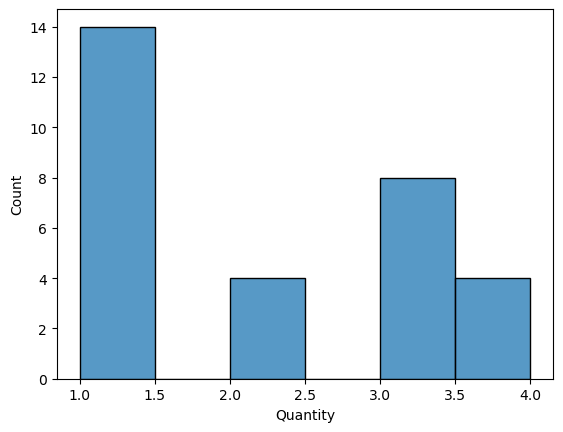

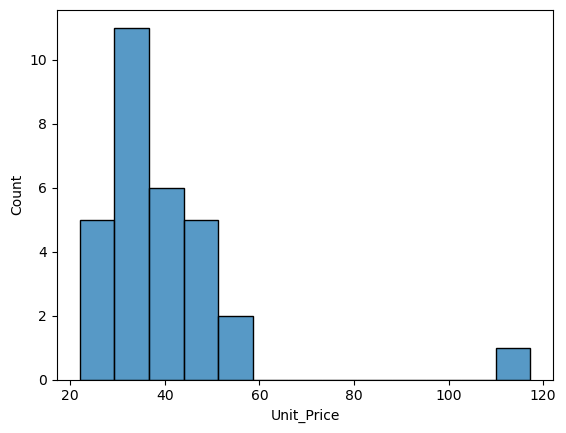

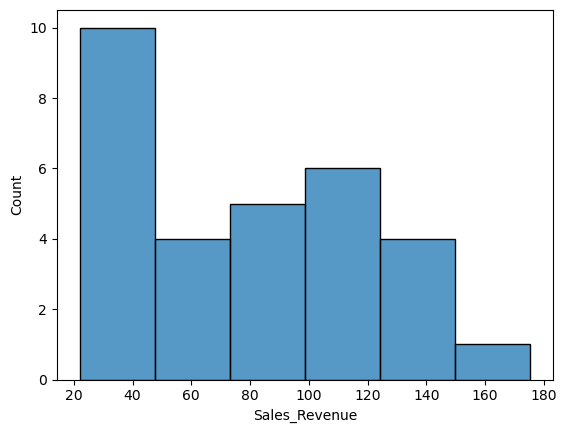

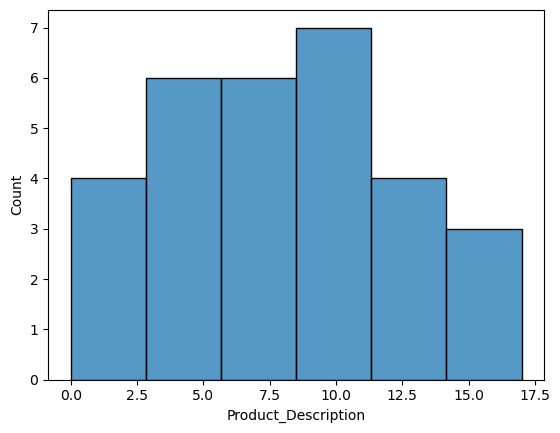

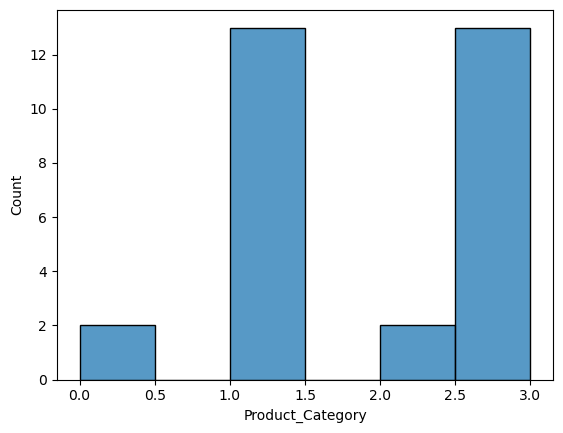

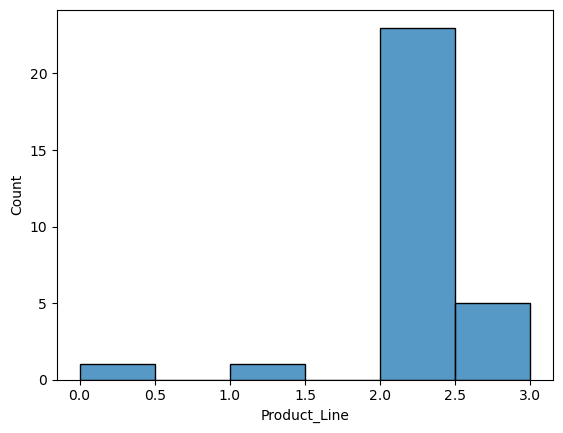

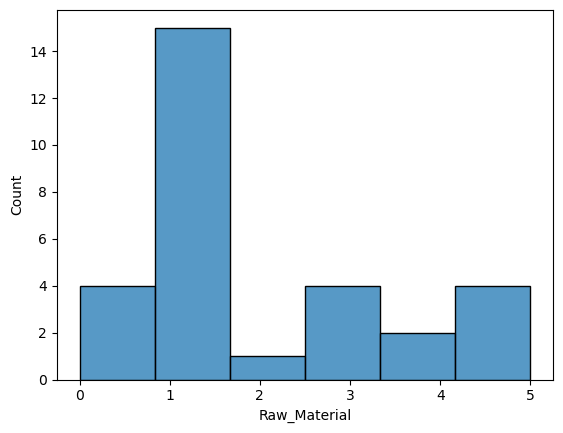

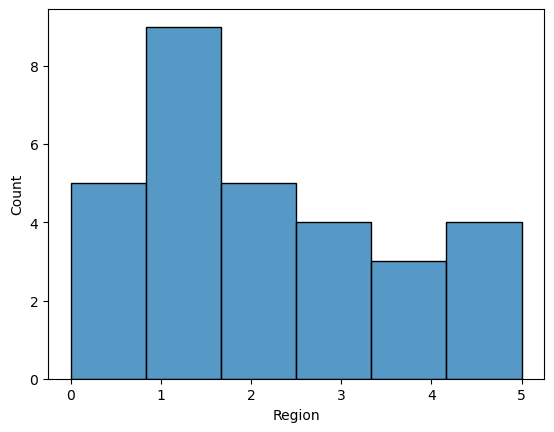

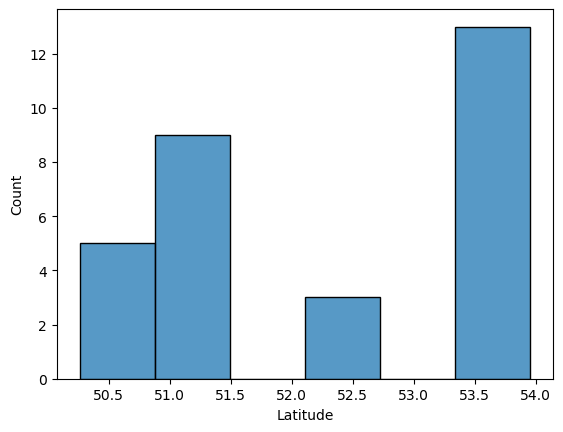

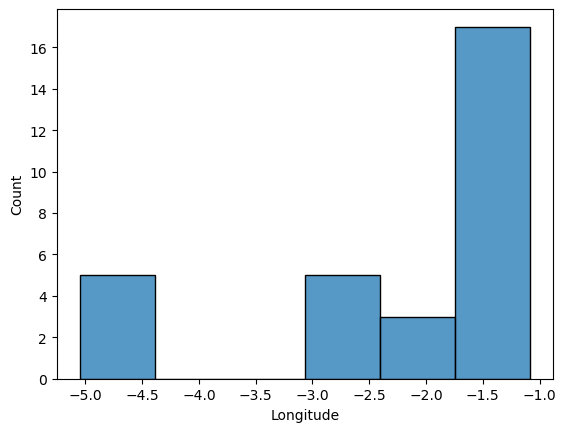

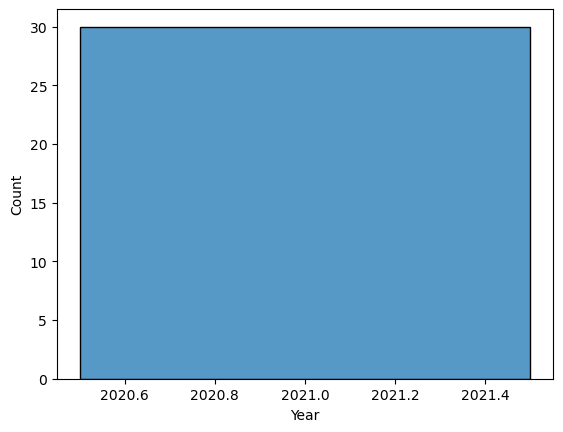

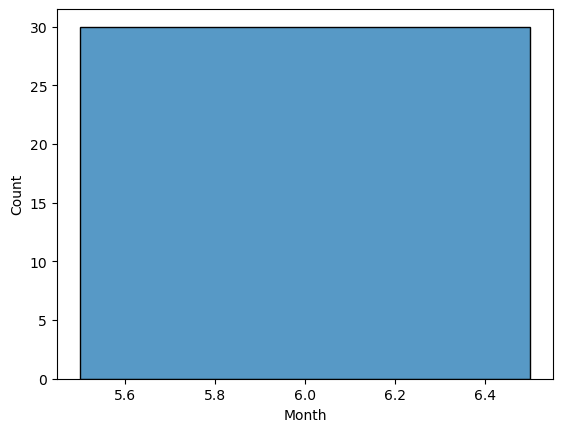

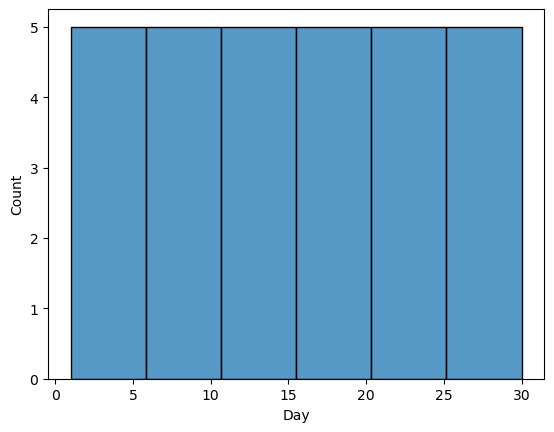

In [343]:
#Histogram for the distribution

warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

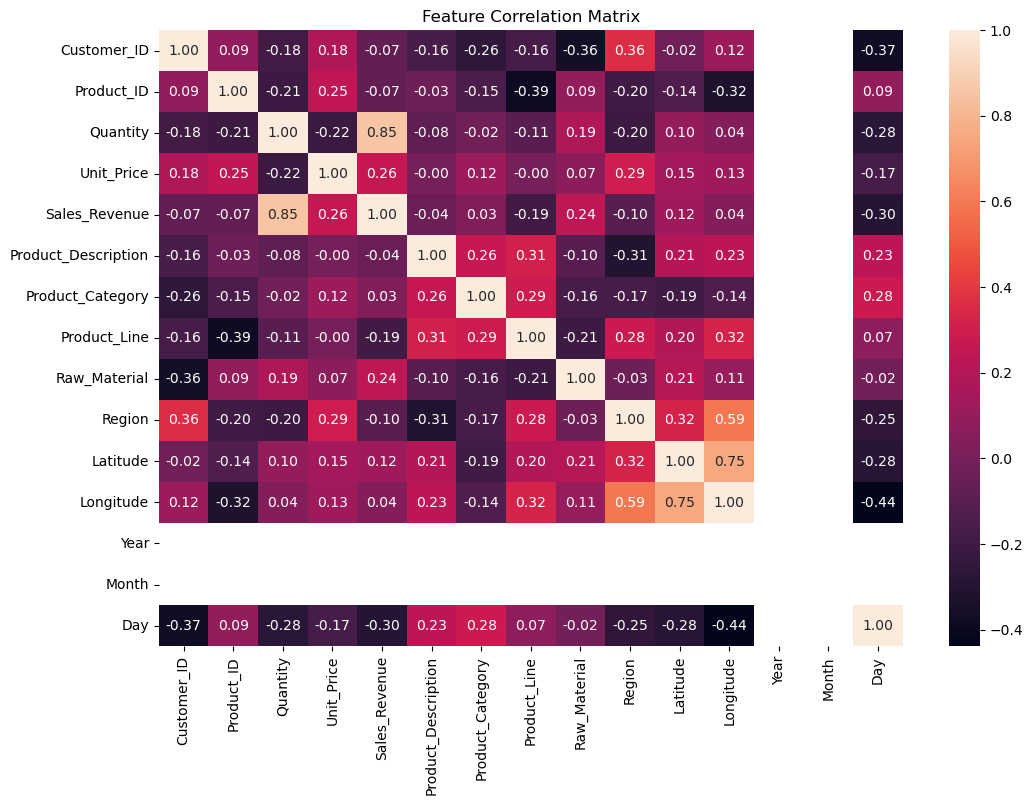

In [344]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

FEATURE ENGINEERING

In [346]:
df['in_Stock'] = ((df['Quantity'] >= 2 ).astype(int))
df['in_Stock'].unique()
df

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day,in_Stock
0,98,321,1,117.306016,117.306016,3,2,2,2,5,53.958332,-1.080278,2021,6,1,0
1,92,261,4,32.272403,129.089613,1,1,2,1,4,52.192001,-2.220000,2021,6,2,1
2,92,264,1,36.193364,36.193364,1,1,2,1,4,52.192001,-2.220000,2021,6,3,0
3,99,251,3,29.913403,89.740210,7,1,3,1,3,51.063202,-1.308000,2021,6,4,1
4,66,251,1,41.843430,41.843430,12,3,3,1,3,51.063202,-1.308000,2021,6,5,0
5,97,304,3,49.887524,149.662573,0,0,0,3,2,51.209000,-2.647000,2021,6,6,1
6,45,357,2,35.416016,70.832032,15,0,2,3,1,53.680000,-1.490000,2021,6,7,1
7,81,258,1,29.084205,29.084205,10,1,2,1,1,53.680000,-1.490000,2021,6,8,0
8,47,260,3,44.498077,133.494232,16,3,2,1,1,53.680000,-1.490000,2021,6,9,1
9,24,263,3,38.497397,115.492191,5,3,2,5,3,51.063202,-1.308000,2021,6,10,1


In [347]:
# Calculate sales frequency by grouping by Product_ID, Region, Year, and Month
df['sales_frequency'] = df.groupby(['Product_ID', 'Region', 'Year', 'Month'])['Customer_ID'].transform('count')
df

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day,in_Stock,sales_frequency
0,98,321,1,117.306016,117.306016,3,2,2,2,5,53.958332,-1.080278,2021,6,1,0,1
1,92,261,4,32.272403,129.089613,1,1,2,1,4,52.192001,-2.220000,2021,6,2,1,1
2,92,264,1,36.193364,36.193364,1,1,2,1,4,52.192001,-2.220000,2021,6,3,0,1
3,99,251,3,29.913403,89.740210,7,1,3,1,3,51.063202,-1.308000,2021,6,4,1,2
4,66,251,1,41.843430,41.843430,12,3,3,1,3,51.063202,-1.308000,2021,6,5,0,2
5,97,304,3,49.887524,149.662573,0,0,0,3,2,51.209000,-2.647000,2021,6,6,1,1
6,45,357,2,35.416016,70.832032,15,0,2,3,1,53.680000,-1.490000,2021,6,7,1,1
7,81,258,1,29.084205,29.084205,10,1,2,1,1,53.680000,-1.490000,2021,6,8,0,1
8,47,260,3,44.498077,133.494232,16,3,2,1,1,53.680000,-1.490000,2021,6,9,1,2
9,24,263,3,38.497397,115.492191,5,3,2,5,3,51.063202,-1.308000,2021,6,10,1,1


SPLIT THE DATA INTO TRAINING AND TESTING SET

In [349]:
Y = df['in_Stock']     #TARGET(Y)
Y


0     0
1     1
2     0
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    1
19    0
20    0
21    1
22    1
23    0
24    1
25    1
26    0
27    0
28    0
29    0
Name: in_Stock, dtype: int32

In [350]:
X = df.drop('in_Stock',axis = 1)    #X-VALUES
X

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day,sales_frequency
0,98,321,1,117.306016,117.306016,3,2,2,2,5,53.958332,-1.080278,2021,6,1,1
1,92,261,4,32.272403,129.089613,1,1,2,1,4,52.192001,-2.220000,2021,6,2,1
2,92,264,1,36.193364,36.193364,1,1,2,1,4,52.192001,-2.220000,2021,6,3,1
3,99,251,3,29.913403,89.740210,7,1,3,1,3,51.063202,-1.308000,2021,6,4,2
4,66,251,1,41.843430,41.843430,12,3,3,1,3,51.063202,-1.308000,2021,6,5,2
5,97,304,3,49.887524,149.662573,0,0,0,3,2,51.209000,-2.647000,2021,6,6,1
6,45,357,2,35.416016,70.832032,15,0,2,3,1,53.680000,-1.490000,2021,6,7,1
7,81,258,1,29.084205,29.084205,10,1,2,1,1,53.680000,-1.490000,2021,6,8,1
8,47,260,3,44.498077,133.494232,16,3,2,1,1,53.680000,-1.490000,2021,6,9,2
9,24,263,3,38.497397,115.492191,5,3,2,5,3,51.063202,-1.308000,2021,6,10,1


In [351]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day,sales_frequency
28,13,286,1,32.745507,32.745507,8,3,2,0,2,51.209000,-2.647000,2021,6,29,2
24,89,277,2,50.795957,101.591915,11,3,2,1,0,50.259998,-5.051000,2021,6,25,1
12,55,260,1,34.742913,34.742913,5,1,2,1,5,53.958332,-1.080278,2021,6,13,1
0,98,321,1,117.306016,117.306016,3,2,2,2,5,53.958332,-1.080278,2021,6,1,1
4,66,251,1,41.843430,41.843430,12,3,3,1,3,51.063202,-1.308000,2021,6,5,2
16,47,274,1,51.968244,51.968244,14,3,2,4,1,53.680000,-1.490000,2021,6,17,1
5,97,304,3,49.887524,149.662573,0,0,0,3,2,51.209000,-2.647000,2021,6,6,1
13,44,286,3,27.028571,81.085713,8,3,2,0,2,51.209000,-2.647000,2021,6,14,2
11,45,260,3,28.540899,85.622698,10,1,2,1,1,53.680000,-1.490000,2021,6,12,2
22,9,285,3,36.190458,108.571375,2,3,2,1,0,50.259998,-5.051000,2021,6,23,1


In [352]:
X_test

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day,sales_frequency
27,56,262,1,33.470936,33.470936,5,1,2,5,5,53.958332,-1.080278,2021,6,28,1
15,31,265,4,43.871537,175.486148,13,1,2,5,1,53.680000,-1.490000,2021,6,16,2
23,66,276,1,54.994305,54.994305,17,3,2,1,3,51.063202,-1.308000,2021,6,24,1
17,47,276,4,33.931775,135.727099,12,3,2,1,1,53.680000,-1.490000,2021,6,18,1
8,47,260,3,44.498077,133.494232,16,3,2,1,1,53.680000,-1.490000,2021,6,9,2
9,24,263,3,38.497397,115.492191,5,3,2,5,3,51.063202,-1.308000,2021,6,10,1


In [353]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Check the distribution of classes after SMOTE
print("SMOTE DISTRIBUTION:", pd.Series(Y_train_resampled).value_counts())

SMOTE DISTRIBUTION: in_Stock
0    12
1    12
Name: count, dtype: int64


In [354]:
# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, Y)

# Check new class distribution
print(pd.Series(Y_resampled).value_counts())

in_Stock
0    14
1    14
Name: count, dtype: int64


In [355]:
X_train_resampled

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day,sales_frequency
0,13,286,1,32.745507,32.745507,8,3,2,0,2,51.209000,-2.647000,2021,6,29,2
1,89,277,2,50.795957,101.591915,11,3,2,1,0,50.259998,-5.051000,2021,6,25,1
2,55,260,1,34.742913,34.742913,5,1,2,1,5,53.958332,-1.080278,2021,6,13,1
3,98,321,1,117.306016,117.306016,3,2,2,2,5,53.958332,-1.080278,2021,6,1,1
4,66,251,1,41.843430,41.843430,12,3,3,1,3,51.063202,-1.308000,2021,6,5,2
5,47,274,1,51.968244,51.968244,14,3,2,4,1,53.680000,-1.490000,2021,6,17,1
6,97,304,3,49.887524,149.662573,0,0,0,3,2,51.209000,-2.647000,2021,6,6,1
7,44,286,3,27.028571,81.085713,8,3,2,0,2,51.209000,-2.647000,2021,6,14,2
8,45,260,3,28.540899,85.622698,10,1,2,1,1,53.680000,-1.490000,2021,6,12,2
9,9,285,3,36.190458,108.571375,2,3,2,1,0,50.259998,-5.051000,2021,6,23,1


In [356]:
Y_train_resampled

0     0
1     1
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    0
18    0
19    0
20    1
21    0
22    0
23    1
Name: in_Stock, dtype: int32

CREATING AND TRAINING THE MODEL

In [358]:
 #Random Forest Classifier
import pickle


rfC_Model = RandomForestClassifier(max_features=None, n_estimators=100,min_samples_leaf=50, oob_score=True, n_jobs=-1, random_state=42,class_weight='balanced')
rfC_Model.fit(X_train_resampled,Y_train_resampled)



RandomForestClassifier(class_weight='balanced', max_features=None,
                       min_samples_leaf=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [359]:
lr_Model = LogisticRegression()
lr_Model.fit(X_train_resampled,Y_train_resampled)

LogisticRegression()

MAKE PREDICTIONS

In [361]:
rf_pred = rf_Model.predict(X_test)
lr_pred = lr_Model.predict(X_test)

print(f"Random Forest Classifier predictions: {rf_pred}")
print(f"Logistic Regression predictions: {lr_pred}")

Random Forest Classifier predictions: [0 1 0 1 1 1]
Logistic Regression predictions: [0 1 0 1 1 1]


In [362]:
print("Random Forest Classification Report:\n",classification_report(Y_test ,rf_pred, zero_division=0)) 
print("Logistic Regression Classification Report:\n" , classification_report(Y_test, lr_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [363]:
print("Random Forest confusion matrix :\n", confusion_matrix(Y_test ,rf_pred))
print("Logistic Regression confusion matrix :\n", confusion_matrix(Y_test , lr_pred))

Random Forest confusion matrix :
 [[2 0]
 [0 4]]
Logistic Regression confusion matrix :
 [[2 0]
 [0 4]]


In [364]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_iter': [100, 200, 300],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
# Initialize RandomizedSearchCV
random_search_lr = RandomizedSearchCV(estimator=lr_Model, param_distributions=param_dist,
                                       n_iter=5, cv=2, scoring='f1_macro', n_jobs=-1)

try:
    random_search_lr.fit(X_train_resampled, Y_train_resampled)
   
    print("Best parameters for Random Forest:", random_search_lr.best_params_)
    print("Best F1 score for Random Forest:", random_search_lr.best_score_)
except Exception as e:
    print(f"Error during Randomized Search: {e}")

Best parameters for Random Forest: {'max_iter': 300, 'C': 0.01}
Best F1 score for Random Forest: 0.916083916083916


In [365]:
#SAVE MODEL

joblib.dump(lr_Model, 'LinearRegressionModel.pkl')

['LinearRegressionModel.pkl']

TIME SERIES ANALYSIS

In [367]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,6))
rf_Model = joblib.load('LinearRegressionModel.pkl')

<Figure size 1000x600 with 0 Axes>

In [368]:
df

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day,in_Stock,sales_frequency
0,98,321,1,117.306016,117.306016,3,2,2,2,5,53.958332,-1.080278,2021,6,1,0,1
1,92,261,4,32.272403,129.089613,1,1,2,1,4,52.192001,-2.220000,2021,6,2,1,1
2,92,264,1,36.193364,36.193364,1,1,2,1,4,52.192001,-2.220000,2021,6,3,0,1
3,99,251,3,29.913403,89.740210,7,1,3,1,3,51.063202,-1.308000,2021,6,4,1,2
4,66,251,1,41.843430,41.843430,12,3,3,1,3,51.063202,-1.308000,2021,6,5,0,2
5,97,304,3,49.887524,149.662573,0,0,0,3,2,51.209000,-2.647000,2021,6,6,1,1
6,45,357,2,35.416016,70.832032,15,0,2,3,1,53.680000,-1.490000,2021,6,7,1,1
7,81,258,1,29.084205,29.084205,10,1,2,1,1,53.680000,-1.490000,2021,6,8,0,1
8,47,260,3,44.498077,133.494232,16,3,2,1,1,53.680000,-1.490000,2021,6,9,1,2
9,24,263,3,38.497397,115.492191,5,3,2,5,3,51.063202,-1.308000,2021,6,10,1,1


In [397]:
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')

In [399]:
print(df.columns)

Index(['Customer_ID', 'Product_ID', 'Quantity', 'Unit_Price', 'Sales_Revenue',
       'Product_Description', 'Product_Category', 'Product_Line',
       'Raw_Material', 'Region', 'Latitude', 'Longitude', 'Year', 'Month',
       'Day', 'in_Stock', 'sales_frequency'],
      dtype='object')


In [401]:
daily_Quantities = df.groupby('Day').sum(numeric_only=True)

In [405]:
from datetime import datetime

daily_Quantities.head()

,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,in_Stock,sales_frequency
Day,,,,,,,,,,,,,,,,
1,98,321,1,117.306016,117.306016,3,2,2,2,5,53.958332,-1.080278,2021,6,0,1
2,92,261,4,32.272403,129.089613,1,1,2,1,4,52.192001,-2.220000,2021,6,1,1
3,92,264,1,36.193364,36.193364,1,1,2,1,4,52.192001,-2.220000,2021,6,0,1
4,99,251,3,29.913403,89.740210,7,1,3,1,3,51.063202,-1.308000,2021,6,1,2
5,66,251,1,41.843430,41.843430,12,3,3,1,3,51.063202,-1.308000,2021,6,0,2


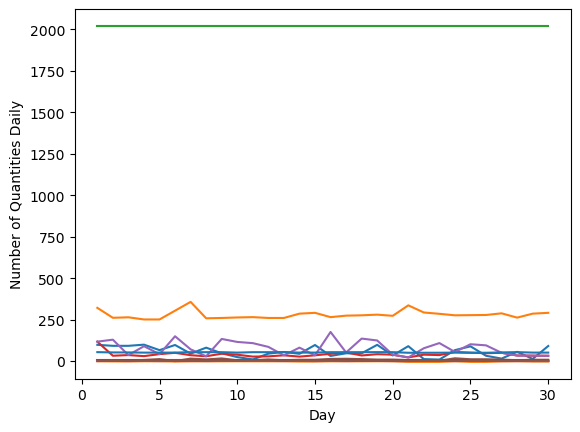

In [407]:
plt.xlabel("Day")
plt.ylabel("Number of Quantities Daily")
plt.plot(daily_Quantities)